In [1]:
import numpy as np
import skimage
from skimage import data
from skimage.color import rgb2gray
#from natsort import natsorted, ns
import os
from skimage import io
from matplotlib import pyplot as plt
from PIL import Image
import cv2

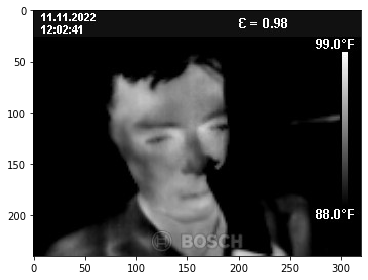

In [2]:
#imports images

list_files = os.listdir('subj018') #change to folder name
#print(list_files)
#list_files = natsorted(list_files)
image_list = []

for filename in list_files:
    image_list.append(io.imread("subj018\\" + filename)) #change to folder name

io.imshow(image_list[21])
#io.imshow(image_list[19][12:25,0:55])

In [3]:
#reads color of pixels

image_listarr = []
for image in image_list:
    image_listarr = np.asarray(image)
width = 240 #rows
length = 320 #cols
levels_list = []

for i in np.arange(np.shape(image_list)[0]):
    black_level_arr = np.zeros([width,length])
    #print(np.ceil((i+1)/21*100), "% done")
    image = image_list[i]
    for x in np.arange(width-1):
        for y in np.arange(length-1):
            value = image[x,y]
            #print(value)
            black_level = value[0] / 255
            black_level_arr[x,y] = black_level
    levels_list.append(black_level_arr)

In [4]:
# importing the module
#import cv2
  
# function to display the coordinates of
# of the points clicked on the image
def click_event(event, x, y, flags, params):
 
    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:
 
        # displaying the coordinates
        # on the Shell
        #print(x, ',', y)
       
        with open('coordinates.txt', 'w') as f:
            f.write(str(x)+ ","+ str(y))
            f.close()
            
        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, str(x) + ',' +
                    str(y), (x,y), font,
                    1, (255, 0, 0), 2)
        cv2.imshow('image', img)
 
    # checking for right mouse clicks    
    if event==cv2.EVENT_RBUTTONDOWN:
 
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
 
        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        b = img[y, x, 0]
        g = img[y, x, 1]
        r = img[y, x, 2]
        cv2.putText(img, str(b) + ',' +
                    str(g) + ',' + str(r),
                    (x,y), font, 1,
                    (255, 255, 0), 2)
        cv2.imshow('image', img)

In [11]:
width = 240 #rows
length = 320 #cols
mintemp=88
maxtemp=99

temps=[]
for i in np.arange(np.shape(image_list)[0]):
    im = Image.fromarray(image_list[i])
    image = im.save("123.png")
    #print(np.ceil((i+1)/21*100), "% done")

#determines coordinates for the image
    #driver function
    if __name__=="__main__":
 
        # reading the image
        img = cv2.imread('123.png', 1)

        # displaying the image
        cv2.imshow('123.png', img)

        # setting mouse handler for the image
        # and calling the click_event() function
        cv2.setMouseCallback('123.png', click_event)

        # wait for a key to be pressed to exit
        cv2.waitKey(0)

        # close the window
        cv2.destroyAllWindows()

#references coordinates with previously created black_levels arrays to get a value which is converted to a temp
    #read file with coordinates
    f=open('coordinates.txt', 'r')
    string=f.read()
    coord=string.split(',')
    #print(coord)
    value = levels_list[i][int(coord[1]),int(coord[0])]
    value = mintemp + value*(maxtemp-mintemp)
    value = round(value, 1)
    temps.append(value)

In [12]:
print(temps)

[93.9, 93.9, 93.9, 94.0, 93.9, 94.2, 94.3, 93.7, 93.8, 93.7, 93.7, 94.1, 94.0, 93.7, 93.8, 93.0, 93.3, 93.3, 93.2, 92.9, 93.3, 93.0, 92.8, 93.2, 92.7, 93.3, 93.0, 93.2, 93.0, 93.3, 93.6, 93.5, 93.4, 93.5, 93.4, 93.3, 93.1, 93.4, 93.6, 94.2, 94.5, 95.1, 95.0, 95.2, 94.8, 94.5, 94.3, 94.3, 93.8, 93.8, 93.8, 93.7, 93.3, 93.5, 93.9, 93.6, 93.2, 93.2, 93.3, 93.6, 93.1, 93.3, 93.2, 92.7, 93.1, 93.7, 94.0, 93.6, 93.8, 93.9, 93.7, 93.4, 93.6, 93.6, 94.1, 93.8, 93.4, 93.7, 93.9, 93.9, 93.3, 93.6, 93.4, 93.5, 93.5, 93.9, 93.6, 93.6, 93.3, 93.4, 93.5, 93.6, 94.0, 94.5, 94.0, 94.1, 93.8, 93.9, 93.7, 93.7, 93.4, 93.6]


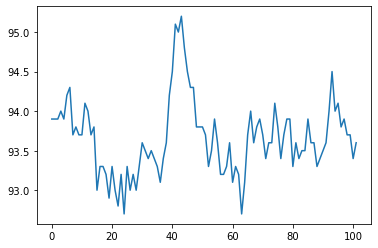

In [13]:
plt.plot(temps)